
Overall Five-Number Summary:
     against_bug  against_dark  against_dragon  against_electric  \
min         0.25          0.25             0.0               0.0   
25%         0.50          1.00             1.0               0.5   
50%         1.00          1.00             1.0               1.0   
75%         1.00          1.00             1.0               1.0   
max         4.00          4.00             2.0               4.0   

     against_fairy  against_fight  against_fire  against_flying  \
min           0.25            0.0          0.25            0.25   
25%           1.00            0.5          0.50            1.00   
50%           1.00            1.0          1.00            1.00   
75%           1.00            1.0          2.00            1.00   
max           4.00            4.0          4.00            4.00   

     against_ghost  sp_attack  sp_defense  speed  weight_kg  
min            0.0       10.0        20.0    5.0        0.1  
25%            1.0       45.0     

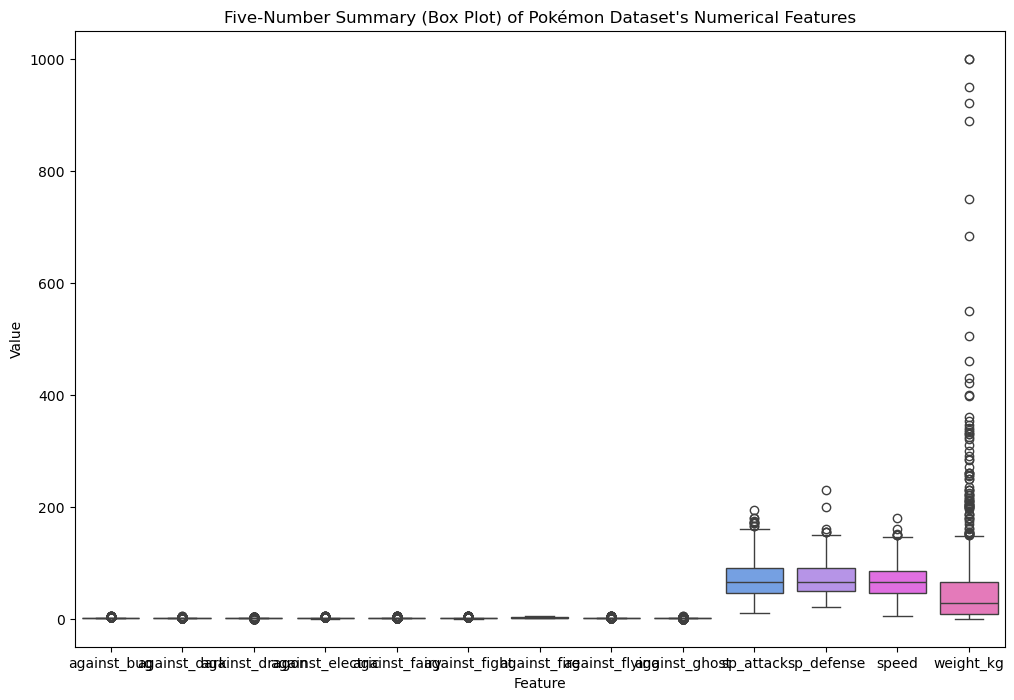

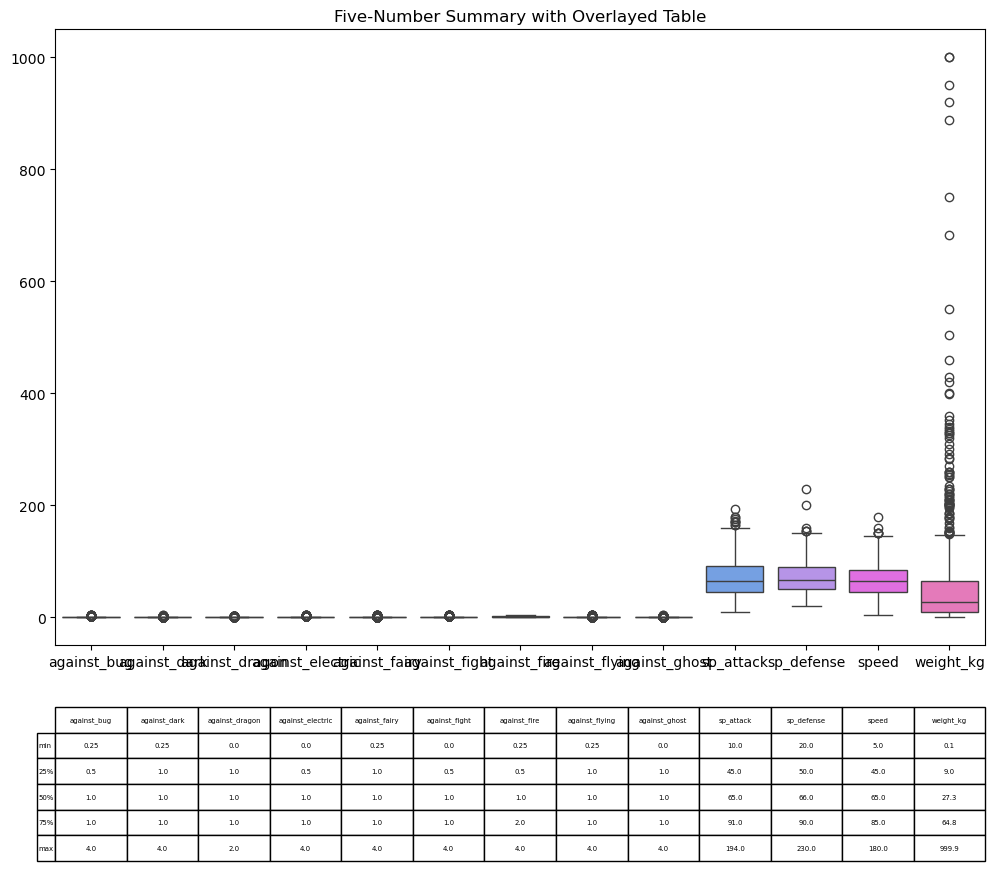

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Pokémon dataset
df = pd.read_csv('pokemon.csv')

# Display the first few rows of the dataset
# print("Dataset Head:")
# print(df.head())

# Select numerical columns for the five-number summary
numerical_cols = [
    'against_bug', 'against_dark', 'against_dragon',
    'against_electric', 'against_fairy', 'against_fight',
    'against_fire', 'against_flying', 'against_ghost',
    'sp_attack', 'sp_defense', 'speed', 'weight_kg'
]

# Step 1: Calculate the overall five-number summary
five_number_summary = df[numerical_cols].describe(percentiles=[0.25, 0.5, 0.75]).loc[['min', '25%', '50%', '75%', 'max']]
print("\nOverall Five-Number Summary:")
print(five_number_summary)

# Step 2: Compare the five-number summary across different types
summary_by_type = df.groupby(['type1', 'type2']).agg(
    min=('sp_defense', 'min'),
    Q1=('sp_defense', lambda x: x.quantile(0.25)),
    median=('sp_defense', 'median'),
    Q3=('sp_defense', lambda x: x.quantile(0.75)),
    max=('sp_defense', 'max')
).reset_index()

print("\nFive-Number Summary by Type:")
print(summary_by_type)

# Step 3: Analyze the five-number summary to identify strong and weak defenders
strong_defenders = df.loc[df['sp_defense'] > df['sp_defense'].quantile(0.75)]
weak_defenders = df.loc[df['sp_defense'] < df['sp_defense'].quantile(0.25)]

print("\nStrong Defenders (Special Defense > 75th Percentile):")
print(strong_defenders[['name', 'sp_defense']])

print("\nWeak Defenders (Special Defense < 25th Percentile):")
print(weak_defenders[['name', 'sp_defense']])

# Step 4: Identify Pokémon with the highest special attack stats
highest_sp_attack = df.loc[df['sp_attack'] == df['sp_attack'].max()]
print("\nPokémon with the Highest Special Attack:")
print(highest_sp_attack[['name', 'sp_attack']])

# Step 5: Visualize the five-number summary with box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_cols])
plt.title("Five-Number Summary (Box Plot) of Pokémon Dataset's Numerical Features")
plt.ylabel("Value")
plt.xlabel("Feature")
plt.show()

# Overlay the five-number summary table on the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_cols])
plt.title("Five-Number Summary with Overlayed Table")

plt.table(
    cellText=five_number_summary.values,
    colLabels=five_number_summary.columns,
    rowLabels=five_number_summary.index,
    cellLoc="center",
    loc="bottom",
    bbox=[0, -0.35, 1, 0.25]
)
plt.show()
